In [1]:
import time
import warnings
import importlib
import numpy as np
import pandas as pd
import seaborn as sns
from astropy import units as u
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
from astroquery.ipac.ned import Ned
from astropy.io import fits
from scipy.optimize import curve_fit,  fsolve
from io import BytesIO
import sympy as smp
from astropy.table import Table
from scipy.interpolate import interp1d
from astropy.convolution import convolve_fft, Gaussian2DKernel

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
warnings.filterwarnings('ignore')
import ztfidr
import galaxy_phot as glp

sample = ztfidr.get_sample()
host_data = ztfidr.io.get_host_data()

conds1 = (sample.data['redshift'] > 0 ) & (sample.data['redshift'] < 0.2) 
conds2 = np.intersect1d(host_data.index, sample.data.index)
data = host_data[['host_ra', 'host_dec']].loc[conds2].dropna()[conds1]
targets = data.index


In [2]:
sn_name = targets[641] 
gd = glp.galaxy_decomp(sn_name, verbose=True, mask=False, size=300, source='query', catalog='ztf')
print(gd.gobj['g'].brick)
print(gd.gobj['r'].brick)

ZTF18acbwawc 170.97124777063763 58.14474919179707 0.039002999999999996 z_gal
ZTF18acbwawc 170.97124777063763 58.14474919179707 0.039002999999999996 z_gal
dr9 300 300
dr9 300 300
{'brickname': '1707p582', 'psfsize': 2.0309107, 'psfdepth': 24.28301, 'galdepth': 24.126656, 'sky': 7.665687e-05, 'sky_mag': 29.847260019833715}
{'brickname': '1707p582', 'psfsize': 1.5543128, 'psfdepth': 23.754051, 'galdepth': 23.535006, 'sky': 0.00025410857, 'sky_mag': 28.556835782363994}


In [3]:
gd.main_run()

r-23.0
r-22.0
r-21.0
r-20.0
r-19.0


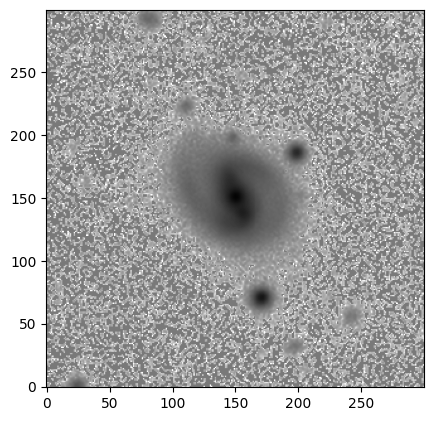

In [51]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
sky_mag = bd.gobj['g'].cutout['mag_raw'].copy()
sky_mag[np.isnan(sky_mag)] = bd.gobj['g'].brick['psfdepth']
ax.imshow(sky_mag, origin='lower', cmap='gray', vmax=30, vmin=19)

In [91]:
importlib.reload(glp)
bd = glp.BDdecomp(sn_name, gd)

In [92]:
bd.main_BD(spokes=12, mode=0, bar=True)

One componenet, BIC: -1732.21, RSS: 41.71, fitted parameters: 7
Two componenet, BIC: -2118.27, RSS: 21.65, fitted parameters: 13
Three componenet, BIC: -2388.52, RSS: 13.30, fitted parameters: 20
Bulge + Bar + Disk preferred


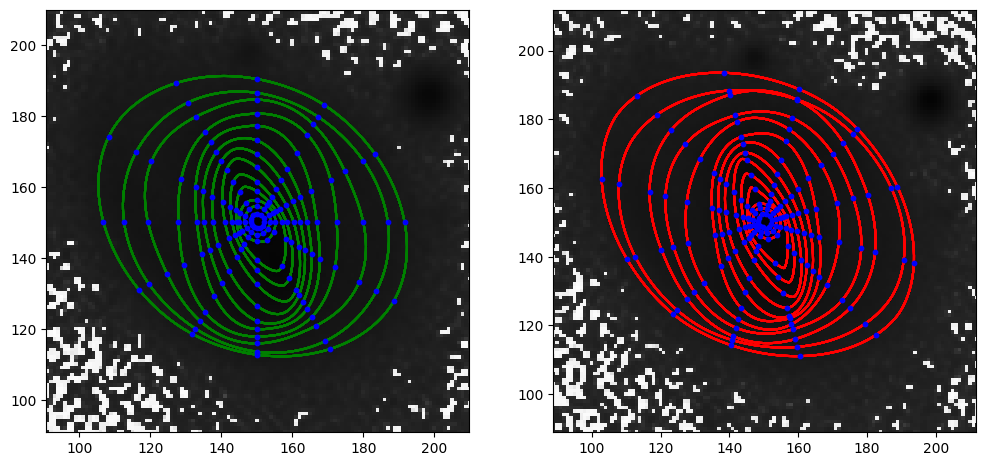

In [101]:
fig, ax = bd.plot_gal_iso(spokes=12)

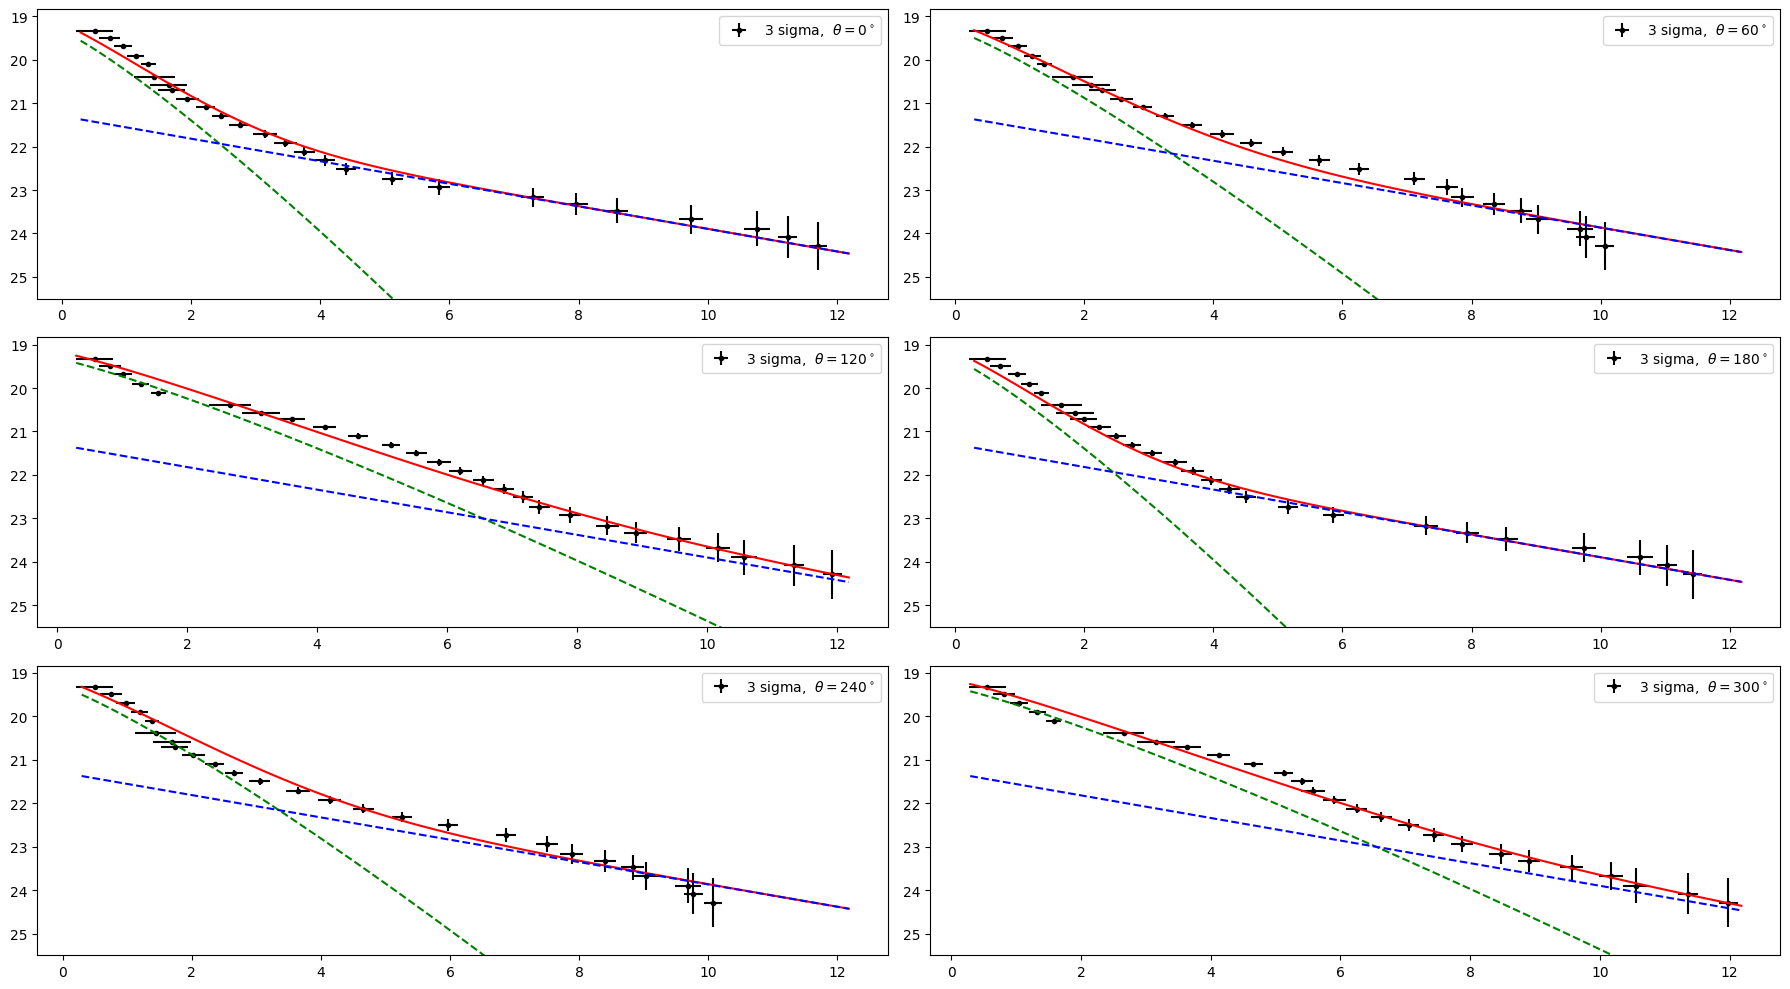

In [93]:
bd.plot_spokes(band='g', sigma=3, n_model=2)

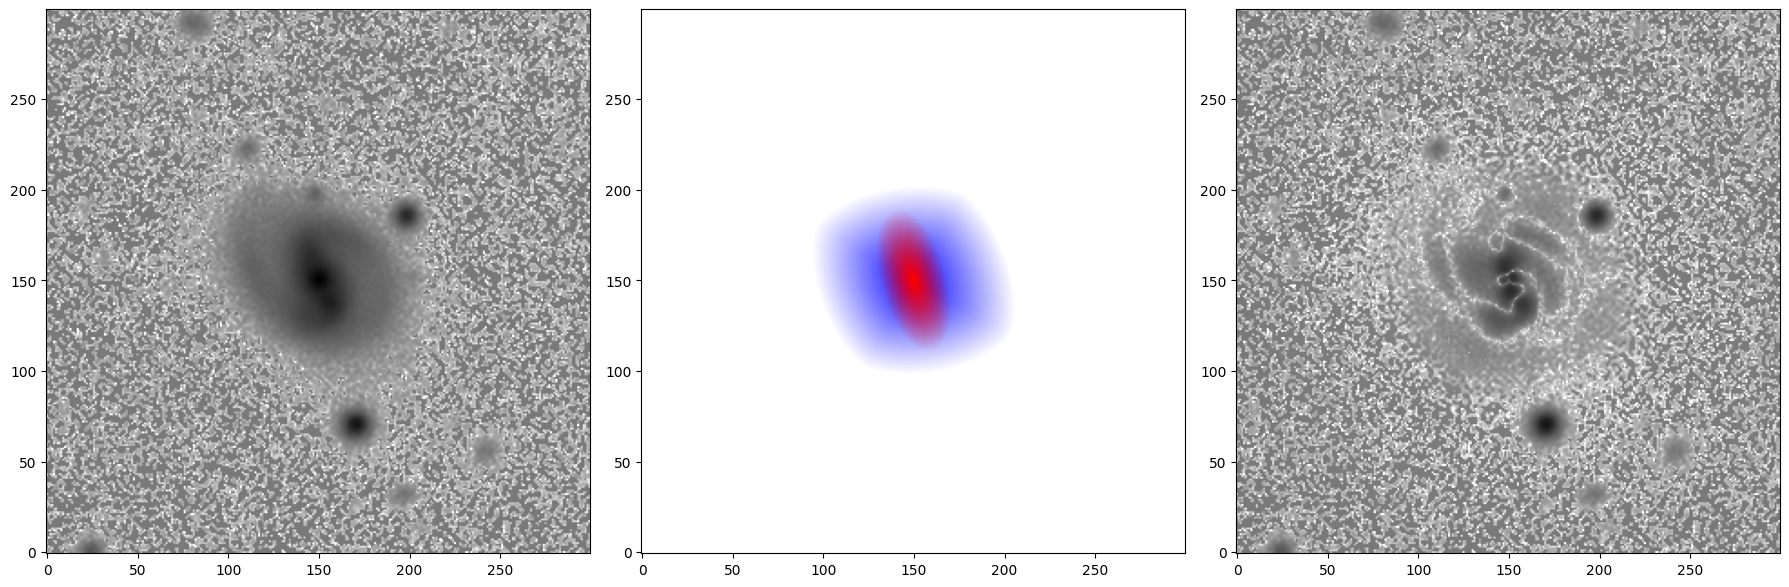

In [94]:
bd.plot_SB_profile(band='g', subtarct=True, n_model=2)

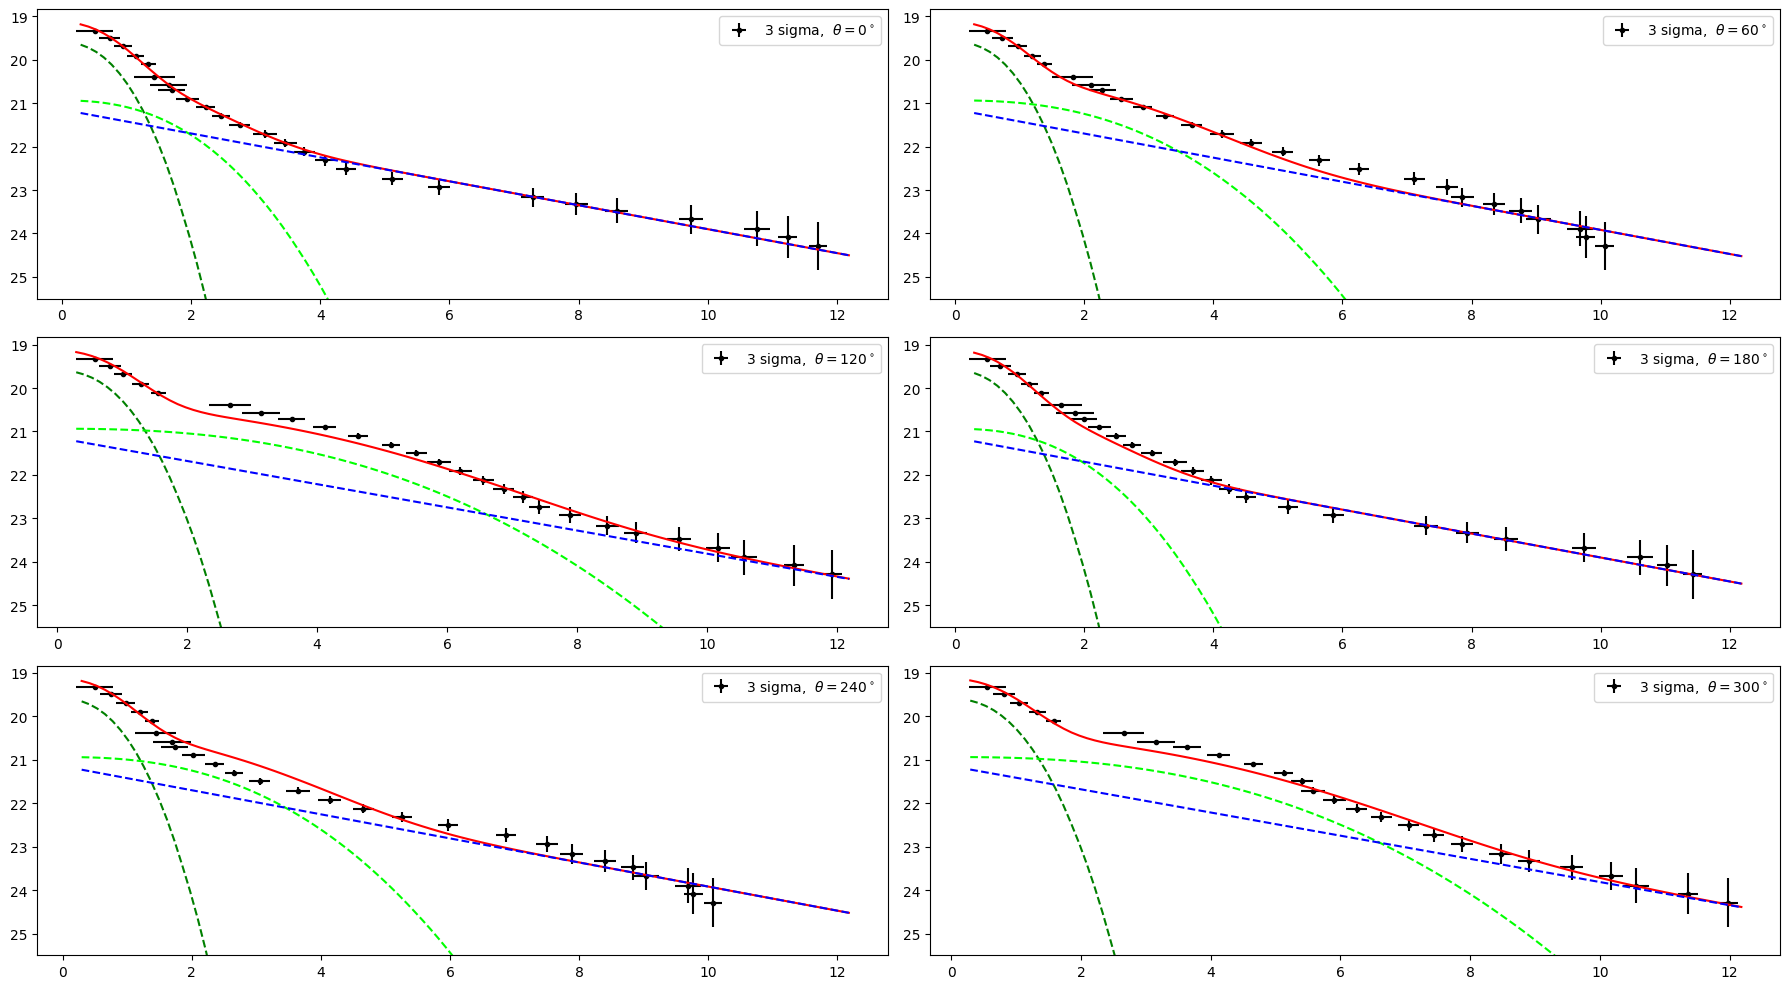

In [95]:
bd.plot_spokes(band='g', sigma=3, n_model=3)

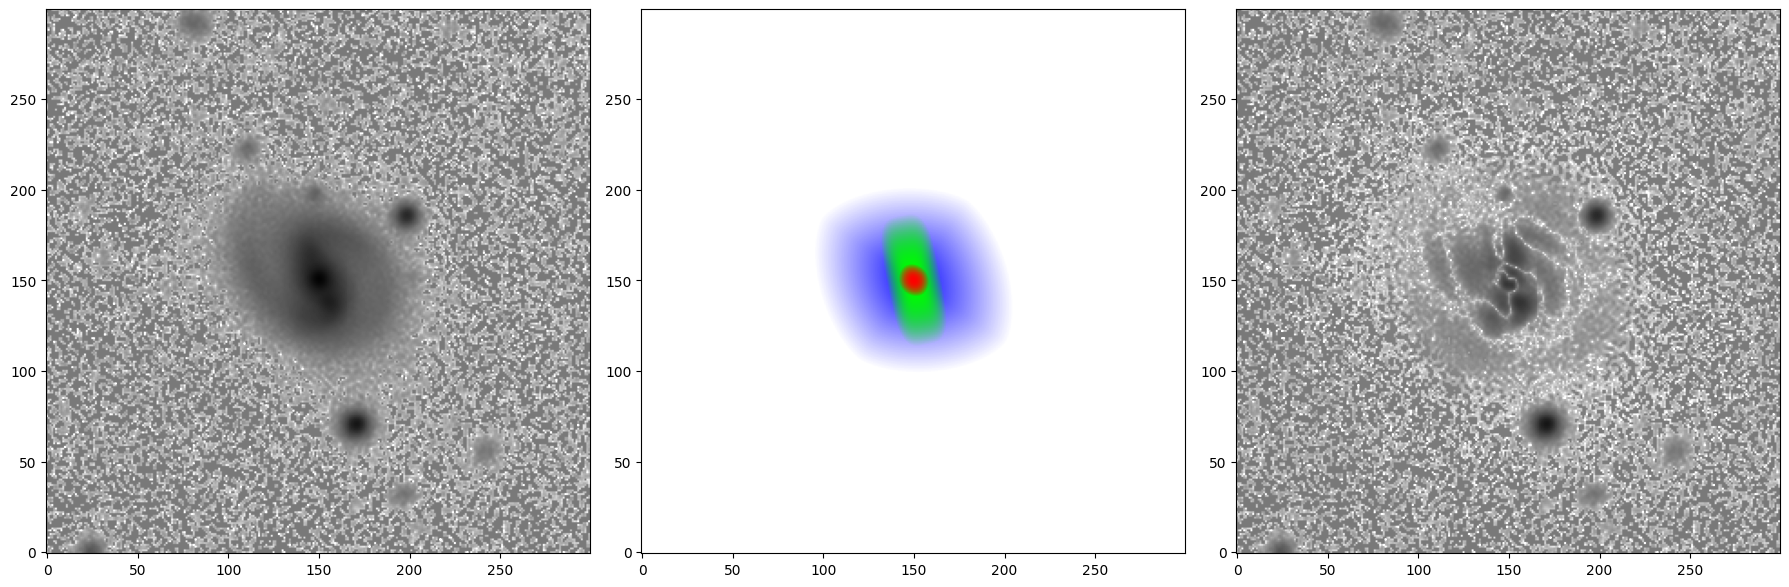

In [100]:
bd.plot_SB_profile(band='g', subtarct=True, n_model=3)